### Plot for knockpy image

In [8]:
import matplotlib.pyplot as plt
def plot_W(kfilter, beta=None, ax=None, **kwargs):
    sorted_inds = np.argsort(0-1*np.abs(kfilter.W))
    sortW = kfilter.W[sorted_inds]
    inds = np.arange(sortW.shape[0])
    threshold_ind = np.argmin(np.abs(sortW) >= kfilter.threshold)
    
    if beta is None:
        redinds = sortW <= 0
        label1 = "W < 0"
        label2 = "W > 0"
    else:
        redinds = beta == 0
        redinds = redinds[sorted_inds]
        label1 = "null"
        label2 = "non-null"
    blueinds = ~redinds.astype(bool)

    if ax is not None:
        fig, ax = plt.subplots(**kwargs)
    ax.bar(
        inds[redinds], sortW[redinds], color='red', label=label1
    )
    ax.bar(
        inds[blueinds], sortW[blueinds], color='blue', label=label2
    )

    ax.axvline(
        threshold_ind, color='black', linestyle='dashed', label='Threshold'
    )
    ax.legend()
    return fig, ax

#kfilter.threshold

In [50]:
import numpy as np
import knockpy
dgproc = knockpy.dgp.DGP()
dgproc.sample_data(n=450, p=100, sparsity=0.2, a=5, b=1, max_corr=0.9999)

kfs = []
methods = ['mvr']
for method in methods:
    kf = knockpy.knockoff_filter.KnockoffFilter(ksampler='fx', fstat='ols', knockoff_kwargs={'method':method})
    kf.forward(X=dgproc.X, y=dgproc.y)
    kfs.append(kf)

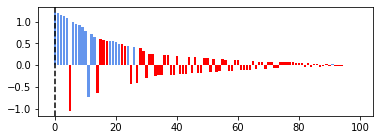

In [52]:
fig, axs = plt.subplots(figsize=(6,2), nrows=len(methods))
if len(methods) == 1:
    axs = [axs]
beta = dgproc.beta
for ax, kfilter, method in zip(axs, kfs, methods):
    sorted_inds = np.argsort(0-1*np.abs(kfilter.W))
    sortW = kfilter.W[sorted_inds]
    inds = np.arange(sortW.shape[0])
    threshold_ind = np.argmin(np.abs(sortW) >= kfilter.threshold)
    
    if beta is None:
        redinds = sortW <= 0
        label1 = "W < 0"
        label2 = "W > 0"
    else:
        redinds = beta == 0
        redinds = redinds[sorted_inds]
        label1 = "null"
        label2 = "non-null"
    blueinds = ~redinds.astype(bool)

    ax.bar(
        inds[redinds], sortW[redinds], color='red', label=label1
    )
    ax.bar(
        inds[blueinds], sortW[blueinds], color='cornflowerblue', label=label2
    )

    ax.axvline(
        threshold_ind, color='black', linestyle='dashed', label='Threshold'
    )
    if method == 'mvr':
        pass
        #ax.legend()

plt.savefig("output_images/knockpy2.png", dpi=500)